In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
city_attributes=pd.read_csv("C:\\Users\\mm\\Desktop\\city_attributes.csv")

In [3]:
city_attributes.head(10)

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683
5,San Diego,United States,32.715328,-117.157257
6,Las Vegas,United States,36.174969,-115.137222
7,Phoenix,United States,33.448380,-112.074043
8,Albuquerque,United States,35.084492,-106.651138
9,Denver,United States,39.739151,-104.984703


In [4]:
humidity=pd.read_csv("C:\\Users\\mm\\Desktop\\humidity.csv")

In [5]:
humidity.head(10)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
5,2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0
6,2012-10-01 18:00:00,78.0,79.0,83.0,78.0,88.0,80.0,21.0,24.0,49.0,...,68.0,56.0,76.0,68.0,55.0,63.0,23.0,51.0,51.0,50.0
7,2012-10-01 19:00:00,79.0,78.0,82.0,77.0,88.0,80.0,21.0,24.0,49.0,...,68.0,56.0,72.0,68.0,56.0,63.0,23.0,51.0,51.0,50.0
8,2012-10-01 20:00:00,79.0,78.0,81.0,77.0,88.0,79.0,20.0,25.0,49.0,...,67.0,56.0,68.0,68.0,57.0,63.0,24.0,51.0,51.0,50.0
9,2012-10-01 21:00:00,80.0,77.0,80.0,76.0,88.0,79.0,20.0,25.0,49.0,...,67.0,55.0,64.0,68.0,58.0,64.0,24.0,51.0,51.0,50.0


In [6]:
for i in humidity.columns:
    humidity=humidity.rename(columns={i:i+"_h"})

In [7]:
pressure=pd.read_csv("C:\\Users\\mm\\Desktop\\pressure.csv")

In [8]:
pressure.head(10)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2,2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
3,2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
4,2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
5,2012-10-01 17:00:00,NaN,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
6,2012-10-01 18:00:00,NaN,1024.0,1010.0,1030.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
7,2012-10-01 19:00:00,NaN,1024.0,1010.0,1031.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,NaN,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
8,2012-10-01 20:00:00,NaN,1024.0,1010.0,1031.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,NaN,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
9,2012-10-01 21:00:00,NaN,1024.0,1010.0,1032.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,NaN,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [9]:
for i in pressure.columns:
    pressure=pressure.rename(columns={i:i+"_P"})

In [10]:
temperature=pd.read_csv("C:\\Users\\mm\\Desktop\\temperature.csv")

In [11]:
temperature.head(10)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5
6,2012-10-01 18:00:00,284.620868,282.117710,289.417494,281.767681,291.846821,291.572917,293.359284,296.700424,285.472132,...,286.037673,288.564730,285.887208,287.368410,306.652574,304.150361,310.158846,304.4,304.4,303.5
7,2012-10-01 19:00:00,284.618824,282.126324,289.403119,281.760297,291.841480,291.582772,293.348320,296.723403,285.551525,...,286.131290,288.643994,285.900348,287.413990,306.406261,304.106534,310.074615,304.4,304.4,303.5
8,2012-10-01 20:00:00,284.616781,282.134939,289.388745,281.752912,291.836139,291.592626,293.337356,296.746381,285.630919,...,286.224906,288.723257,285.913487,287.459569,306.159948,304.062708,309.990385,304.4,304.4,303.5
9,2012-10-01 21:00:00,284.614738,282.143553,289.374370,281.745528,291.830798,291.602480,293.326392,296.769360,285.710312,...,286.318522,288.802521,285.926627,287.505149,305.913635,304.018881,309.906154,304.4,304.4,303.5


In [12]:
for i in temperature.columns:
    temperature=temperature.rename(columns={i:i+"_t"})

In [13]:
wind_direction=pd.read_csv("C:\\Users\\mm\\Desktop\\wind_direction.csv")

In [14]:
wind_direction.head(10)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0
5,2012-10-01 17:00:00,47.0,44.0,129.0,24.0,0.0,0.0,51.0,8.0,360.0,...,274.0,261.0,234.0,61.0,157.0,282.0,30.0,336.0,336.0,329.0
6,2012-10-01 18:00:00,61.0,57.0,123.0,32.0,0.0,0.0,65.0,8.0,360.0,...,275.0,261.0,236.0,61.0,157.0,269.0,30.0,336.0,336.0,329.0
7,2012-10-01 19:00:00,75.0,70.0,117.0,39.0,0.0,0.0,79.0,7.0,360.0,...,276.0,262.0,237.0,62.0,157.0,257.0,30.0,336.0,336.0,329.0
8,2012-10-01 20:00:00,89.0,83.0,110.0,47.0,0.0,0.0,94.0,7.0,360.0,...,277.0,262.0,238.0,62.0,157.0,245.0,30.0,336.0,336.0,329.0
9,2012-10-01 21:00:00,102.0,96.0,104.0,54.0,0.0,0.0,108.0,6.0,360.0,...,279.0,263.0,240.0,63.0,157.0,232.0,30.0,336.0,336.0,329.0


In [15]:
for i in wind_direction.columns:
    wind_direction=wind_direction.rename(columns={i:i+"_w"})

In [16]:
allData = pd.concat([humidity, pressure, temperature, wind_direction], axis = 1)

In [17]:
allData

,datetime_h,Vancouver_h,Portland_h,San Francisco_h,Seattle_h,Los Angeles_h,San Diego_h,Las Vegas_h,Phoenix_h,Albuquerque_h,...,Philadelphia_w,New York_w,Montreal_w,Boston_w,Beersheba_w,Tel Aviv District_w,Eilat_w,Haifa_w,Nahariyya_w,Jerusalem_w
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,...,290.0,NaN,300.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,...,290.0,NaN,300.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,...,320.0,NaN,290.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,...,330.0,NaN,290.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
allData.isna().sum()

datetime_h                0
Vancouver_h            1826
Portland_h              449
San Francisco_h         942
Seattle_h               289
                       ... 
Tel Aviv District_w     793
Eilat_w                 797
Haifa_w                 793
Nahariyya_w             793
Jerusalem_w             793
Length: 148, dtype: int64

In [19]:
allData=allData.dropna()

In [20]:
allData.isna().sum()

datetime_h             0
Vancouver_h            0
Portland_h             0
San Francisco_h        0
Seattle_h              0
                      ..
Tel Aviv District_w    0
Eilat_w                0
Haifa_w                0
Nahariyya_w            0
Jerusalem_w            0
Length: 148, dtype: int64

C:\Users\mm\AppData\Local\Temp\ipykernel_12268\302246001.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(allData.corr())


<Axes: >

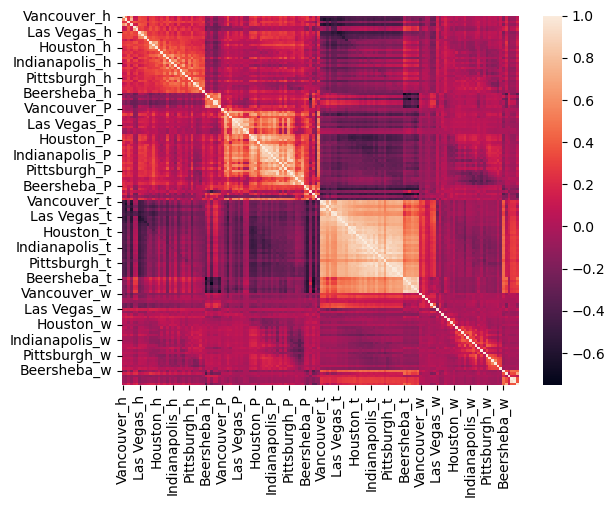

In [21]:
sns.heatmap(allData.corr())

<Axes: xlabel='Pittsburgh_t', ylabel='count'>

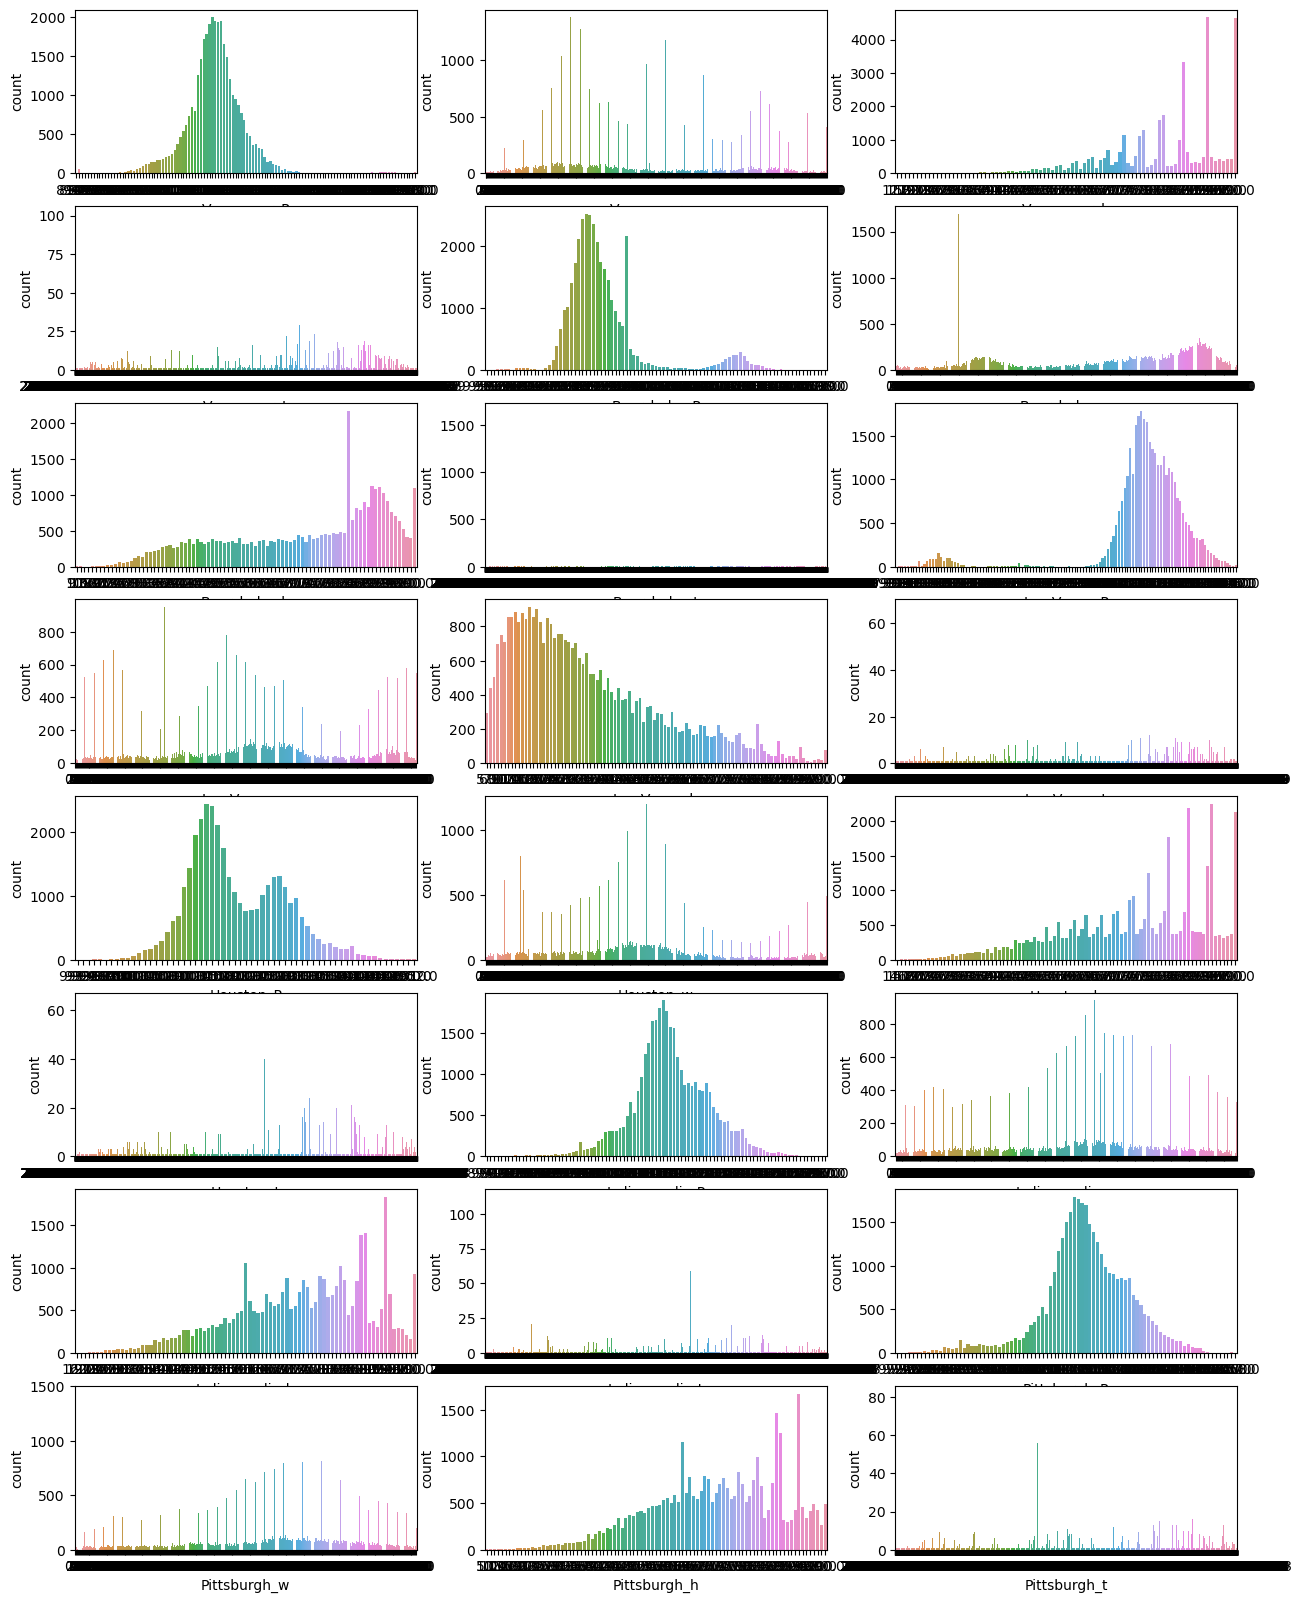

In [23]:
#charts that show all data in one chart
#each chart telling me info about the rating og hotel
g,axes=plt.subplots(nrows=8,ncols=3,figsize=(15,20))
sns.countplot(x="Vancouver_P",data=allData,ax=axes[0][0])
sns.countplot(x="Vancouver_w",data=allData,ax=axes[0][1])
sns.countplot(x="Vancouver_h",data=allData,ax=axes[0][2])
sns.countplot(x="Vancouver_t",data=allData,ax=axes[1][0])
sns.countplot(x="Beersheba_P",data=allData,ax=axes[1][1])
sns.countplot(x="Beersheba_w",data=allData,ax=axes[1][2])
sns.countplot(x="Beersheba_h",data=allData,ax=axes[2][0])
sns.countplot(x="Beersheba_t",data=allData,ax=axes[2][1])
sns.countplot(x="Las Vegas_P",data=allData,ax=axes[2][2])
sns.countplot(x="Las Vegas_w",data=allData,ax=axes[3][0])
sns.countplot(x="Las Vegas_h",data=allData,ax=axes[3][1])
sns.countplot(x="Las Vegas_t",data=allData,ax=axes[3][2])
sns.countplot(x="Houston_P",data=allData,ax=axes[4][0])
sns.countplot(x="Houston_w",data=allData,ax=axes[4][1])
sns.countplot(x="Houston_h",data=allData,ax=axes[4][2])
sns.countplot(x="Houston_t",data=allData,ax=axes[5][0])
sns.countplot(x="Indianapolis_P",data=allData,ax=axes[5][1])
sns.countplot(x="Indianapolis_w",data=allData,ax=axes[5][2])
sns.countplot(x="Indianapolis_h",data=allData,ax=axes[6][0])
sns.countplot(x="Indianapolis_t",data=allData,ax=axes[6][1])
sns.countplot(x="Pittsburgh_P",data=allData,ax=axes[6][2])
sns.countplot(x="Pittsburgh_w",data=allData,ax=axes[7][0])
sns.countplot(x="Pittsburgh_h",data=allData,ax=axes[7][1])
sns.countplot(x="Pittsburgh_t",data=allData,ax=axes[7][2])

In [118]:
import datetime

#day in sequence, day in year, hour, temperature 

#graph first 
#print(vancouver_temp['datetime'][1])
#convert to datetime 

#date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
date_parsed = pd.to_datetime(allData['datetime_P'], format='%Y-%m-%d %H:%M:%S')
date_parsed.append(pd.to_datetime(allData['datetime_h'], format='%Y-%m-%d %H:%M:%S'))
date_parsed.append(pd.to_datetime(allData['datetime_t'], format='%Y-%m-%d %H:%M:%S'))
date_parsed.append(pd.to_datetime(allData['datetime_w'], format='%Y-%m-%d %H:%M:%S'))
#X = vancouver_temp['datetime']
#y = ['Vancouver']
#print(date_parsed[1].hour) # int
#print(date_parsed[1].dayofyear) # int

dayofyear = [datetime.dayofyear for datetime in date_parsed ]
hourofday = [datetime.hour for datetime in date_parsed]

#print(dayofyear)
#print(len(dayofyear))

#print(hourofday)
#print(len(hourofday))

training_data = np.vstack((dayofyear, hourofday)).T
test=allData['Vancouver_t']
test.append(allData["Vancouver_P"])
test.append(allData["Vancouver_w"])
test.append(allData["Vancouver_h"])
testing_Data=test

C:\Users\mm\AppData\Local\Temp\ipykernel_12268\207605289.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  date_parsed.append(pd.to_datetime(allData['datetime_h'], format='%Y-%m-%d %H:%M:%S'))
C:\Users\mm\AppData\Local\Temp\ipykernel_12268\207605289.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  date_parsed.append(pd.to_datetime(allData['datetime_t'], format='%Y-%m-%d %H:%M:%S'))
C:\Users\mm\AppData\Local\Temp\ipykernel_12268\207605289.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  date_parsed.append(pd.to_datetime(allData['datetime_w'], format='%Y-%m-%d %H:%M:%S'))
C:\Users\mm\AppData\Local\Temp\ipykernel_12268\207605289.py:30: FutureWarning: The series.append method is deprecated and will be removed from

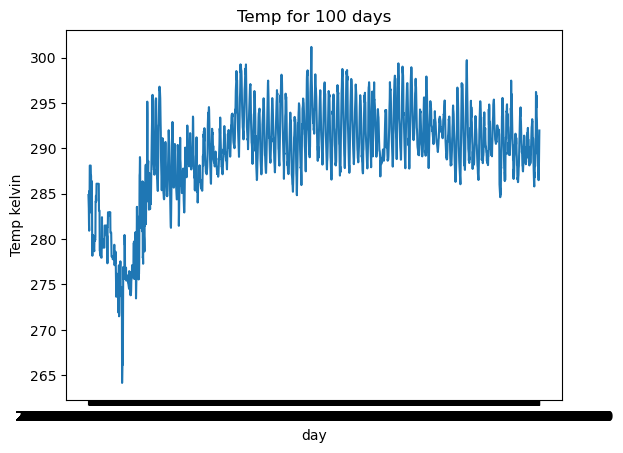

In [109]:
plt.plot(allData.iloc[:100*24, 0],testing_data[:100*24])
plt.title('Temp for 100 days')
plt.xlabel('day')
plt.ylabel('Temp kelvin')
plt.show()

In [119]:
testing_data.shape

(35123,)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(training_data, testing_data, test_size=0.2,random_state=42)

In [121]:
# Scalarize the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
#  Random Forest 
regr = RandomForestRegressor()

regr.fit(X_train, y_train)

RandomForestRegressor()

In [146]:
regr.score(X_train, y_train)

0.8627521912266201

In [124]:
Linear= LinearRegression()
Linear.fit(X_train,y_train)

LinearRegression()

In [125]:
Linear.score(X_train,y_train)

0.010039289734385504

In [141]:
regrs = MLPRegressor(random_state=1000, max_iter=5000).fit(X_train, y_train)

In [142]:
regrs.score(X_train,y_train)

0.8027470850831167